![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Mileage'}>, <AxesSubplot:>]],
      dtype=object)

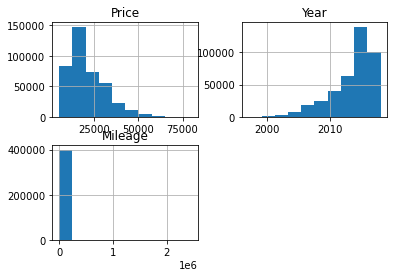

In [4]:
dataTraining.hist()

In [5]:
dataTraining['State'].describe()

count     400000
unique        51
top           TX
freq       45918
Name: State, dtype: object

In [6]:
nans = dataTraining.isnull().values.any()
nans

False

In [7]:
dataTraining['State'].unique()

array([' FL', ' OH', ' TX', ' CO', ' ME', ' WA', ' CT', ' CA', ' LA',
       ' NY', ' PA', ' SC', ' ND', ' NC', ' GA', ' AZ', ' TN', ' KY',
       ' NJ', ' UT', ' IA', ' AL', ' NE', ' IL', ' OK', ' MD', ' NV',
       ' WV', ' MI', ' VA', ' WI', ' MA', ' OR', ' IN', ' NM', ' MO',
       ' HI', ' KS', ' AR', ' MN', ' MS', ' MT', ' AK', ' VT', ' SD',
       ' NH', ' DE', ' ID', ' RI', ' WY', ' DC'], dtype=object)

In [8]:
dataTraining['Make'].unique()

array(['Jeep', 'Chevrolet', 'BMW', 'Cadillac', 'Mercedes-Benz', 'Toyota',
       'Buick', 'Dodge', 'Volkswagen', 'GMC', 'Ford', 'Hyundai',
       'Mitsubishi', 'Honda', 'Nissan', 'Mazda', 'Volvo', 'Kia', 'Subaru',
       'Chrysler', 'INFINITI', 'Land', 'Porsche', 'Lexus', 'MINI',
       'Lincoln', 'Audi', 'Ram', 'Mercury', 'Tesla', 'FIAT', 'Acura',
       'Scion', 'Pontiac', 'Jaguar', 'Bentley', 'Suzuki', 'Freightliner'],
      dtype=object)

In [9]:
dataTraining['Model'].unique()

array(['Wrangler', 'Tahoe4WD', 'X5AWD', 'SRXLuxury', '3', 'C-ClassC300',
       'CamryL', 'TacomaPreRunner', 'LaCrosse4dr', 'ChargerSXT',
       'CamryLE', 'Jetta', 'AcadiaFWD', 'EscapeSE', 'SonataLimited',
       'Santa', 'Outlander', 'CruzeSedan', 'Civic', 'CorollaL', '350Z2dr',
       'EdgeSEL', 'F-1502WD', 'FocusSE', 'PatriotSport', 'Accord',
       'MustangGT', 'FusionHybrid', 'ColoradoCrew', 'Wrangler4WD',
       'CR-VEX-L', 'CTS', 'CherokeeLimited', 'Yukon', 'Elantra', 'New',
       'CorollaLE', 'Canyon4WD', 'Golf', 'Sonata4dr', 'Elantra4dr',
       'PatriotLatitude', 'Mazda35dr', 'Tacoma2WD', 'Corolla4dr',
       'Silverado', 'TerrainFWD', 'EscapeFWD', 'Grand', 'RAV4FWD',
       'Liberty4WD', 'FocusTitanium', 'DurangoAWD', 'S60T5', 'CivicLX',
       'MuranoAWD', 'ForteEX', 'TraverseAWD', 'CamaroConvertible',
       'Sportage2WD', 'Pathfinder4WD', 'Highlander4dr', 'WRXSTI', 'Ram',
       'F-150XLT', 'SiennaXLE', 'LaCrosseFWD', 'RogueFWD', 'CamaroCoupe',
       'JourneySXT', 'Acc

In [11]:
dataTraining.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


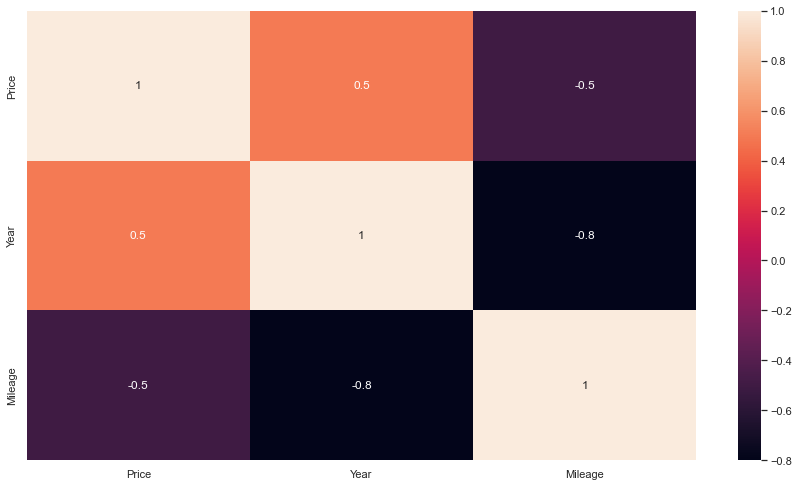

In [12]:
matrix_corr = pd.DataFrame(dataTraining).corr().round(1)
sns.set(rc={'figure.figsize':(15,8.27)})
sns.heatmap(matrix_corr, annot=True)
plt.show()

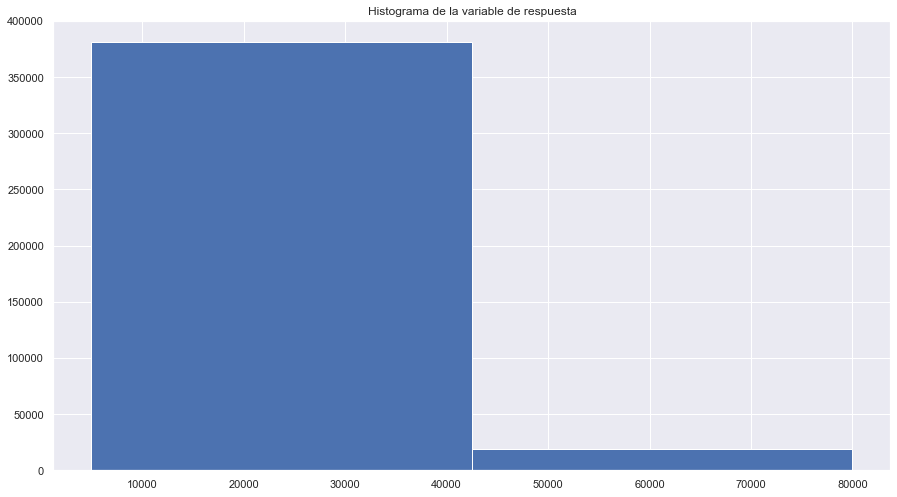

In [13]:
plt.hist(dataTraining['Price'], bins=2)
mensaje = ['Histograma de la variable de respuesta']
plt.title(" ".join(mensaje))
plt.show()

In [14]:
dataTraining = dataTraining.drop(['Year'], axis=1)
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['Make'], prefix='Ma')).drop(['Make'], axis=1)
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['Model'], prefix='Mo')).drop(['Model'], axis=1)
dataTraining = dataTraining.join(pd.get_dummies(dataTraining['State'], prefix='S')).drop(['State'], axis=1)

In [15]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Mileage,Ma_Acura,Ma_Audi,Ma_BMW,Ma_Bentley,Ma_Buick,Ma_Cadillac,Ma_Chevrolet,Ma_Chrysler,...,S_ SD,S_ TN,S_ TX,S_ UT,S_ VA,S_ VT,S_ WA,S_ WI,S_ WV,S_ WY
0,34995,9913,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37895,20578,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18430,83716,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,24681,28729,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26998,64032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Visualización datos de test
dataTesting.head()

In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()